# 프로그래밍3 기말대체 
산업데이터사이언스학부 201902293 김수현

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mplt
import seaborn as sns

In [11]:
df=pd.read_csv('C:/Users/user-pc/Downloads/telco.csv')
type(df)

pandas.core.frame.DataFrame

# 데이터 속성

In [4]:
df

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [5]:
df.shape

(3333, 11)

3333개의 row와 11개의 column으로 구성

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


데이터 정보 확인

In [7]:
df.describe()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


표준편차, 평균, 최소 최대값 등 확인

데이터 분석

분석할 것
1. 로밍시간이 길수록 데이터요금제를 사용하는가
2. 로밍시간이 길 수록 가입을 갱신하는가

사용할 데이터 설명

NewContract=가입갱신여부(1이면 갱신)	


IsData=	데이터요금제사용여부(1이면 사용)


RoamingMin=	로밍시간(분)

In [80]:
df.groupby('IsData').IsData.count()

IsData
0    2411
1     922
Name: IsData, dtype: int64

데이터요금제를 사용하지 않은 사람은 2411명이며 데이터요금제를 사용하는 사람은 922명이다

In [36]:
df.sort_values("RoamingMin",ascending=False).head(10)

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
115,1,36,0,1,5.4,0,196.8,89,110.0,12.75,20.0
314,0,128,1,0,0.0,0,125.2,99,39.0,10.27,18.9
1816,0,53,1,0,0.0,2,184.8,98,50.0,10.82,18.4
2816,1,130,1,0,0.0,1,263.7,113,61.0,9.33,18.3
2371,0,100,1,0,0.0,1,191.9,95,50.0,10.05,18.2
535,0,194,1,0,0.0,1,48.4,101,33.0,14.06,18.2
367,0,45,1,0,0.0,1,78.2,127,35.0,12.67,18.0
2534,0,81,1,0,0.0,1,115.3,99,39.0,11.24,18.0
1257,0,73,1,0,0.0,1,182.3,115,48.0,9.96,18.0
1420,1,81,0,0,0.0,3,149.4,68,41.0,8.60,17.9


로밍시간이 긴 순서대로 정렬하였다 

C:\Users\user-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


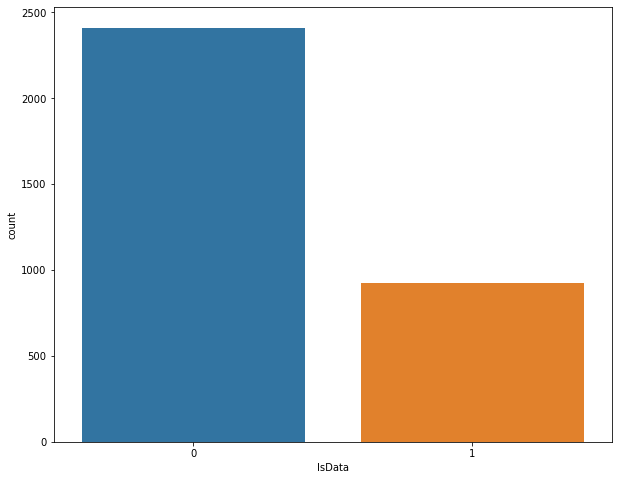

In [46]:
fig, axes = plt.subplots(1, 1, figsize = (10, 8))
sns.countplot('IsData', data=df)
plt.show()

데이터사용여부를 그래프로 시각화 하였다.

In [13]:
df.groupby('NewContract').IsData.count()

NewContract
0     323
1    3010
Name: IsData, dtype: int64

가입을 갱신한 사람은 3010명이고 갱신하지 않은 사람은 323명이다.

C:\Users\user-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


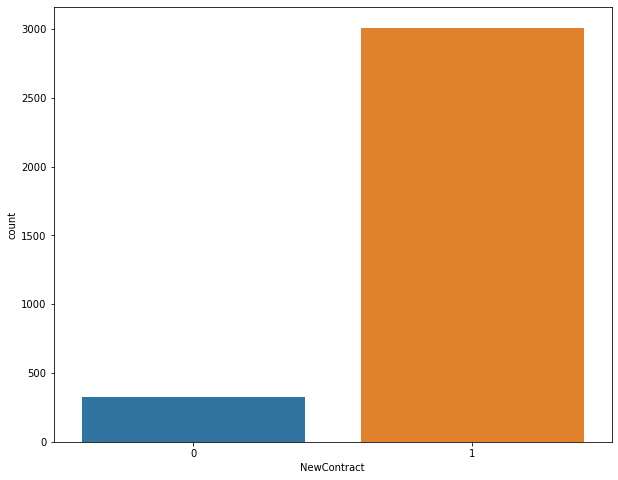

In [47]:
fig, axes = plt.subplots(1, 1, figsize = (10, 8))
sns.countplot('NewContract', data=df)
plt.show()

In [14]:
print('가장 긴 로밍시간 ',(df['RoamingMin'].max()))
print('가장 짧은 로밍시간 ',(df['RoamingMin'].min()))
print('평균 로밍시간 ',(df['RoamingMin'].mean()))

가장 긴 로밍시간  20.0
가장 짧은 로밍시간  0.0
평균 로밍시간  10.237293729372933


가장 긴 로밍시간과 가장 짧은 로밍시간 평균 로밍시간을 계산해보았다.

가장 긴 로밍시간은 20분이며 가장 짧은 로밍시간은 0이다.

평균적으로 10분의 로밍시간을 사용하는 것을 알 수 있다. 

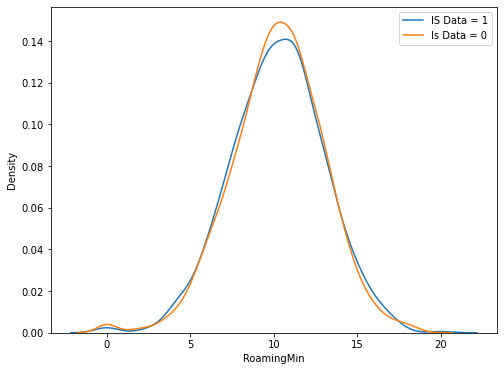

In [39]:
fig, axes = plt.subplots(1, 1, figsize = (8, 6))
sns.kdeplot(df[df['IsData'] == 1]['RoamingMin'],axes=axes)
sns.kdeplot(df[df['IsData'] == 0]['RoamingMin'],axes=axes)
                     

plt.legend(['IS Data = 1', 'Is Data = 0'])    
plt.show()

데이터요금제사용여부에 따른 로밍시간을 히스토그램으로 시각화하였다.

로밍시간이 긴쪽에서는 데이터요금제를 사용하지 않은 사람들이 데이터요금제를 사용하는 사람들보다 많은 것을 알 수 있다.

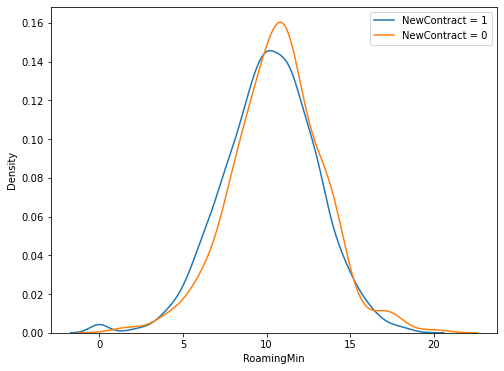

In [52]:
fig, axes = plt.subplots(1, 1, figsize = (8, 6))
sns.kdeplot(df[df['NewContract'] == 1]['RoamingMin'],axes=axes)
sns.kdeplot(df[df['NewContract'] == 0]['RoamingMin'],axes=axes)
                     
plt.xlabel('RoamingMin')
plt.legend(['NewContract = 1', 'NewContract = 0'])    
plt.show()

가입갱신여부에 따른 로밍시간을 히스토그램으로 시각화하였다
로밍시간이 긴쪽에서는 가입갱신하지않은 사람들이 가입을 갱신한 사람들보다 많다.

# 결과

로밍시간이 길 수록 데이터요금제를 사용하지 않고 로밍시간이 길 수 록 가입갱신률은 감소한다.